In [1]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('Jimmy.csv')

# Menampilkan 5 baris pertama dataset
print(df.head())


   No  Nama   Usia  Jenis kelamin           Jurusan  Matematika  IPA  \
0   1  Jimmy     20             L       Informatika          80   78   
1   2   Rudi     21             L       Informatika          76   77   
2   3  Daffa     19             L  sistem informasi          80   85   
3   4  Revan     20             L       Informatika          86   82   
4   5    Ami     21             P       Informatika          92   76   

   Bahasa inggris  
0              92  
1              90  
2              89  
3              88  
4              78  


In [2]:
# Memeriksa ukuran dataset
print(f"Ukuran dataset: {df.shape}")

# Memeriksa tipe data setiap kolom
print(df.dtypes)

# Memeriksa nilai yang hilang
print(df.isnull().sum())

# Deskripsi statistik dasar
print(df.describe(include='all'))


Ukuran dataset: (8, 8)
No                 int64
Nama              object
Usia               int64
Jenis kelamin     object
Jurusan           object
Matematika         int64
IPA                int64
Bahasa inggris     int64
dtype: object
No                0
Nama              0
Usia              0
Jenis kelamin     0
Jurusan           0
Matematika        0
IPA               0
Bahasa inggris    0
dtype: int64
             No  Nama      Usia  Jenis kelamin      Jurusan  Matematika  \
count   8.00000      8   8.00000             8            8    8.000000   
unique      NaN      8       NaN             2            3         NaN   
top         NaN  Jimmy       NaN             L  Informatika         NaN   
freq        NaN      1       NaN             5            5         NaN   
mean    4.50000    NaN  20.12500           NaN          NaN   83.375000   
std     2.44949    NaN   0.64087           NaN          NaN    5.629958   
min     1.00000    NaN  19.00000           NaN          NaN   76.

In [11]:
import pandas as pd

# Memuat dataset
df = pd.read_csv('Jimmy.csv')

# Menampilkan nama kolom untuk memastikan ejaan yang benar
print("Kolom yang tersedia:", df.columns)

# Membersihkan nama kolom dari spasi
df.columns = df.columns.str.strip()

# Coba konversi ulang kolom 'Usia' setelah memastikan namanya benar
if 'Usia' in df.columns:
    df['Usia'] = pd.to_numeric(df['Usia'], errors='coerce')
else:
    print("Kolom 'Usia' tidak ditemukan! Cek nama kolom di dataset.")

# Menampilkan dataset setelah perbaikan
print(df.head())


Kolom yang tersedia: Index(['No', 'Nama ', 'usia ', 'Jenis kelamin', 'Jurusan', 'Matematika', 'IPA',
       'Bahasa inggris'],
      dtype='object')
Kolom 'Usia' tidak ditemukan! Cek nama kolom di dataset.
   No   Nama  usia Jenis kelamin           Jurusan  Matematika  IPA  \
0   1  Jimmy    20             L       Informatika          80   78   
1   2   Rudi    21             L       Informatika          76   77   
2   3  Daffa    19             L  sistem informasi          80   85   
3   4  Revan    20             L       Informatika          86   82   
4   5    Ami    21             P       Informatika          92   76   

   Bahasa inggris  
0              92  
1              90  
2              89  
3              88  
4              78  


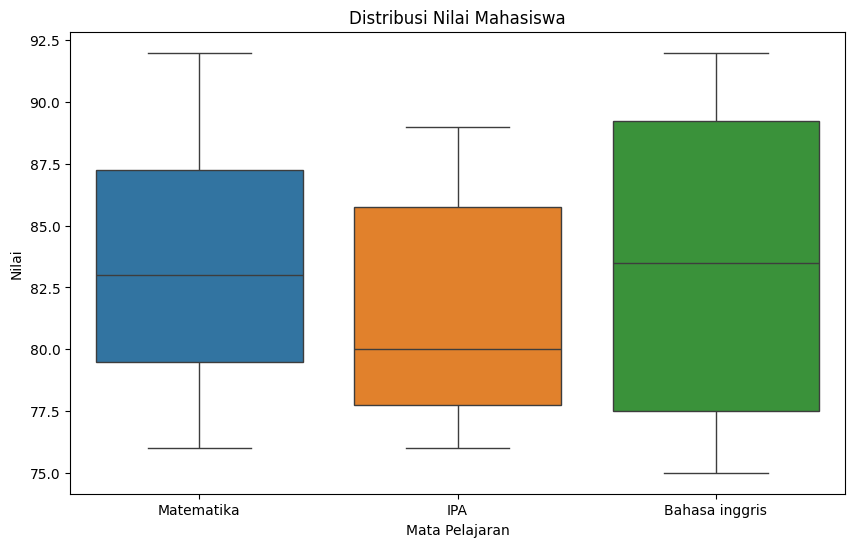

In [4]:
# Boxplot untuk nilai setiap mata pelajaran
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Matematika', 'IPA', 'Bahasa inggris']])
plt.title('Distribusi Nilai Mahasiswa')
plt.xlabel('Mata Pelajaran')
plt.ylabel('Nilai')
plt.show()


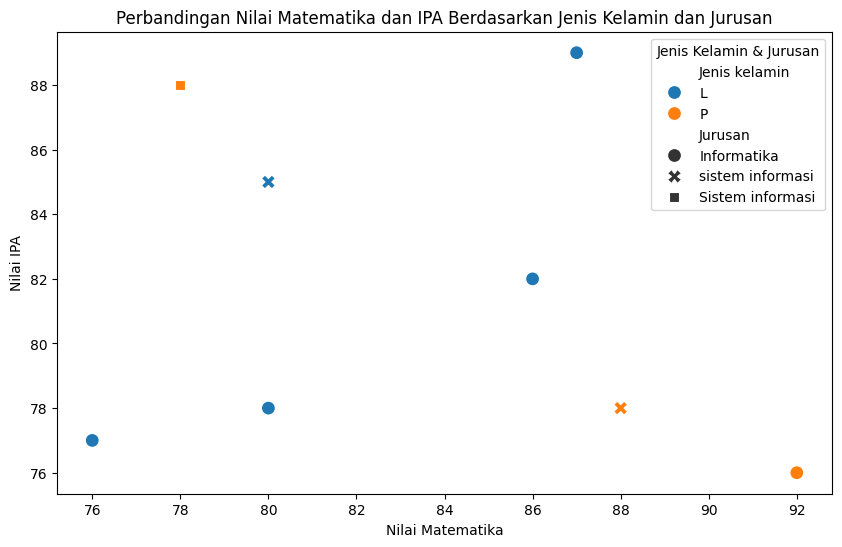

In [5]:
# Scatter plot untuk perbandingan nilai berdasarkan jenis kelamin dan jurusan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Matematika', y='IPA', hue='Jenis kelamin', style='Jurusan', data=df, s=100)
plt.title('Perbandingan Nilai Matematika dan IPA Berdasarkan Jenis Kelamin dan Jurusan')
plt.xlabel('Nilai Matematika')
plt.ylabel('Nilai IPA')
plt.legend(title='Jenis Kelamin & Jurusan')
plt.show()


In [24]:
from sklearn.model_selection import train_test_split

if all(col in df.columns for col in ['Nama', 'Jenis Kelamin', 'Jurusan']):
    X = df.drop(columns=['Nama', 'Jenis Kelamin', 'Jurusan'])
    y = df['Jurusan'].astype(str)
    
    # Membagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    print("Pembagian data latih dan uji berhasil.")
else:
    print("Kolom yang dibutuhkan untuk pemisahan data tidak lengkap dalam dataset.")


Kolom yang dibutuhkan untuk pemisahan data tidak lengkap dalam dataset.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
import numpy as np

# 1. Memuat Dataset
try:
    df = pd.read_csv("Jimmy.csv")
    df.columns = df.columns.str.strip()  # Menghapus spasi di awal/akhir nama kolom
    print("Dataset berhasil dimuat.")
except FileNotFoundError:
    print("Error: File Jimmy.csv tidak ditemukan.")
    exit()

# Menampilkan 5 baris pertama dataset
print("5 Baris Pertama Dataset:")
print(df.head())

# 2. Eksplorasi Awal Dataset
print("\nUkuran dataset:", df.shape)
print("\nTipe data tiap kolom:")
print(df.dtypes)
print("\nJumlah nilai yang hilang:")
print(df.isnull().sum())
print("\nDeskripsi Statistik:")
print(df.describe(include='all'))

# 3. Visualisasi Data
# a. Histogram untuk distribusi usia
if 'Usia' in df.columns:
    df['Usia'] = pd.to_numeric(df['Usia'], errors='coerce')  # Pastikan 'Usia' bertipe numerik
    plt.figure(figsize=(8, 6))
    sns.histplot(df['Usia'].dropna(), bins=5, kde=True, color='royalblue', edgecolor='black')
    plt.title('Distribusi Usia Mahasiswa', fontsize=14, fontweight='bold')
    plt.xlabel('Usia (Tahun)', fontsize=12)
    plt.ylabel('Frekuensi', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("Kolom 'Usia' tidak ditemukan dalam dataset.")

# b. Boxplot untuk nilai setiap mata pelajaran
nilai_kolom = ['Matematika', 'IPA', 'Bahasa Inggris']
if all(col in df.columns for col in nilai_kolom):
    df[nilai_kolom] = df[nilai_kolom].apply(pd.to_numeric, errors='coerce')  # Konversi nilai ke numerik
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[nilai_kolom])
    plt.title('Distribusi Nilai Mahasiswa')
    plt.xlabel('Mata Pelajaran')
    plt.ylabel('Nilai')
    plt.show()
else:
    print("Beberapa kolom nilai tidak ditemukan dalam dataset.")

# 4. Memisahkan fitur dan target
if all(col in df.columns for col in ['Nama', 'Jenis Kelamin', 'Jurusan']):
    X = df.drop(columns=['Nama', 'Jenis Kelamin', 'Jurusan'])
    y = df['Jurusan'].astype(str)
    
    # Membagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("Pembagian data latih dan uji berhasil.")

    # 5. Melatih model Logistic Regression
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    print("Model Logistic Regression telah dilatih.")

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # 6. Evaluasi Model
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)

    # 7. Cross-Validation (K-Fold)
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'K-Fold Cross-validation Scores: {scores}')
    print(f'Mean Score: {scores.mean()}')

    # 8. Grid Search Hyperparameter Tuning
    param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
    grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)

    # 9. Random Search Hyperparameter Tuning
    param_distributions = {'C': np.logspace(-3, 3, 10), 'max_iter': [100, 200, 300, 400, 500]}
    random_search = RandomizedSearchCV(LogisticRegression(), param_distributions, n_iter=10, cv=5, scoring='accuracy', random_state=42)
    random_search.fit(X_train, y_train)
    print("Best Parameters (Random Search):", random_search.best_params_)
    print("Best Score (Random Search):", random_search.best_score_)
else:
    print("Kolom-kolom yang dibutuhkan untuk pemodelan tidak lengkap dalam dataset.")


Dataset berhasil dimuat.
5 Baris Pertama Dataset:
   No   Nama  usia Jenis kelamin           Jurusan  Matematika  IPA  \
0   1  Jimmy    20             L       Informatika          80   78   
1   2   Rudi    21             L       Informatika          76   77   
2   3  Daffa    19             L  sistem informasi          80   85   
3   4  Revan    20             L       Informatika          86   82   
4   5    Ami    21             P       Informatika          92   76   

   Bahasa inggris  
0              92  
1              90  
2              89  
3              88  
4              78  

Ukuran dataset: (8, 8)

Tipe data tiap kolom:
No                 int64
Nama              object
usia               int64
Jenis kelamin     object
Jurusan           object
Matematika         int64
IPA                int64
Bahasa inggris     int64
dtype: object

Jumlah nilai yang hilang:
No                0
Nama              0
usia              0
Jenis kelamin     0
Jurusan           0
Matematika     

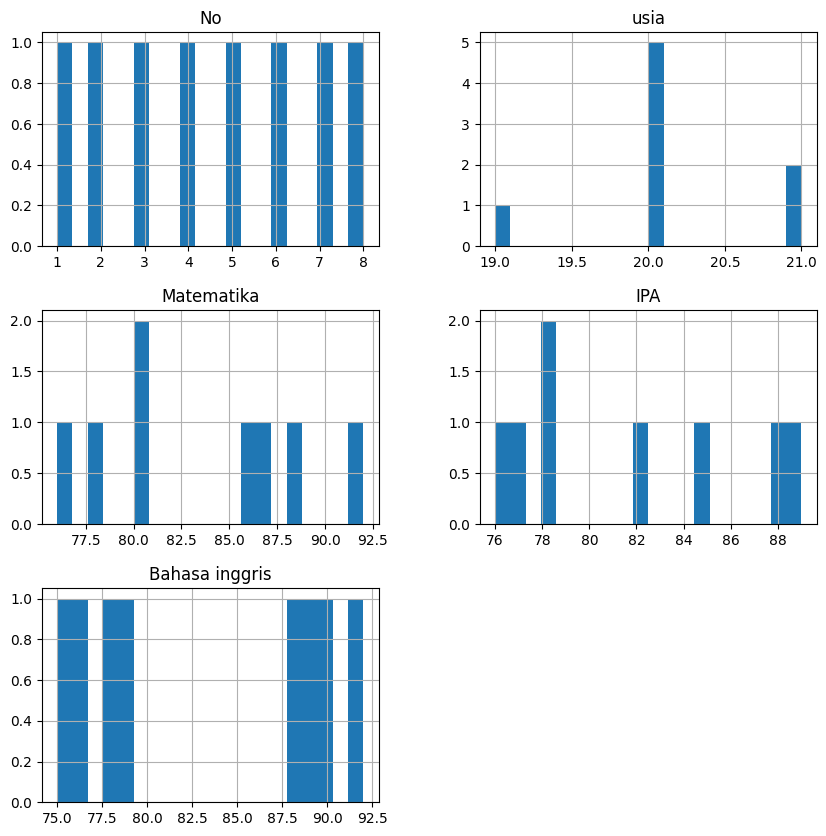

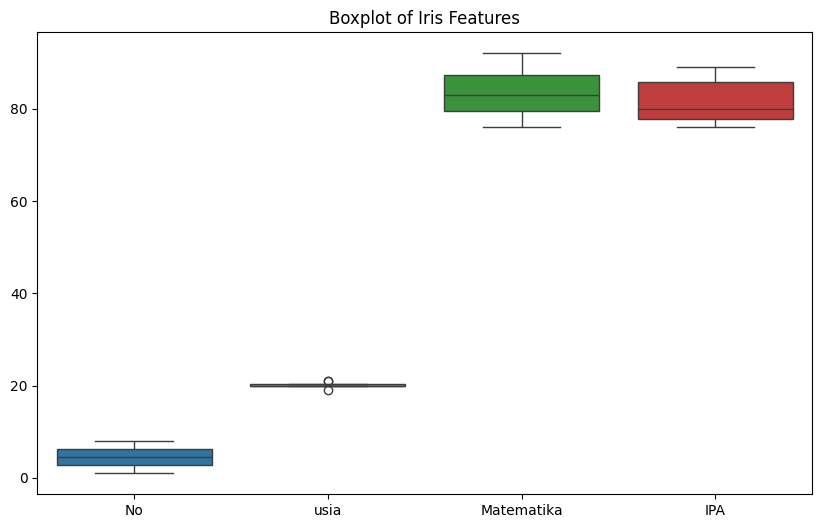

In [39]:
# Distribusi Variabel: Distribusi variabel individual dapat divisualisasikanmenggunakan histogram atau boxplot.
import matplotlib.pyplot as plt
import seaborn as sns
# Histogram untuk setiap fitur
df.hist(bins=20, figsize=(10, 10))
plt.show()
# Boxplot untuk setiap fitur
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])
plt.title('Boxplot of Iris Features')
plt.show()

KeyError: 'species'

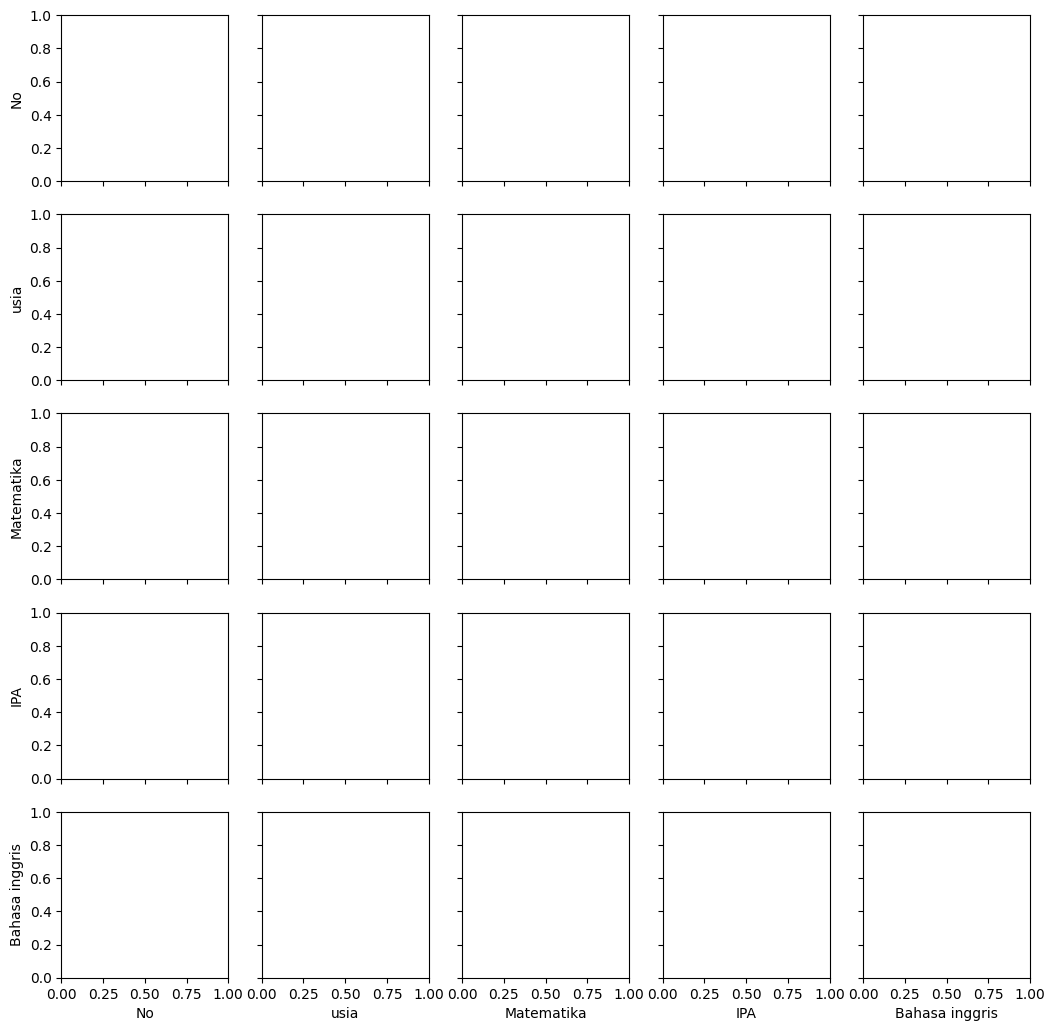

In [38]:
# Hubungan Antar Variabel: Hubungan antar variabel dapat divisualisasikanmenggunakan pairplot atau scatter plot.
# Pairplot untuk melihat hubungan antar variabel
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.show()
# Scatter plot untuk hubungan spesifik
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species',
data=df, palette='viridis')
plt.title('Scatter plot of Sepal Length vs Sepal Width')
plt.show()

C:\Users\jimmy\AppData\Local\Temp\ipykernel_16240\4210080762.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Jurusan', data=df, palette='viridis')


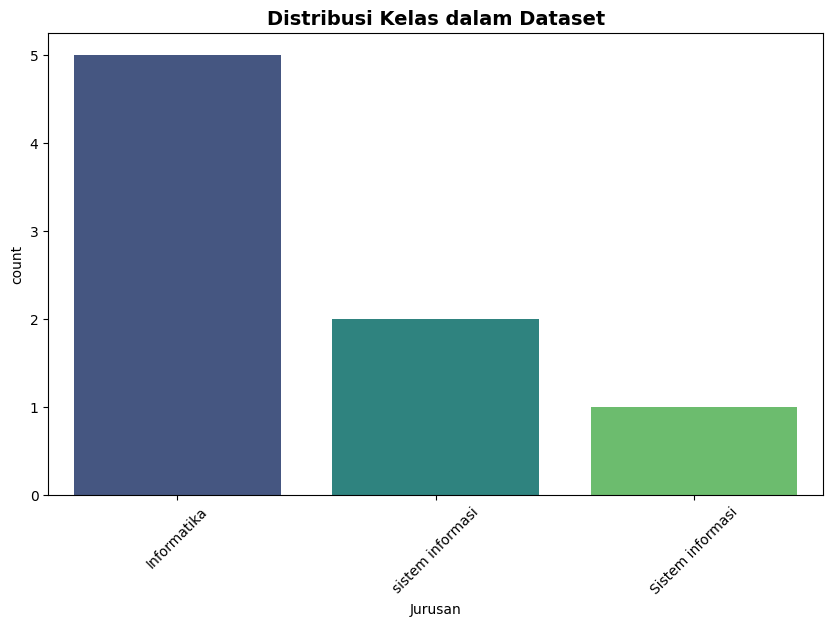

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Jurusan', data=df, palette='viridis')
plt.title('Distribusi Kelas dalam Dataset', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.show()


In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
# Memuat dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
# Mengatur model
model = LogisticRegression(max_iter=200)

In [33]:
# Mengatur K-Fold Cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross-validation dan menghitung skor
scores = cross_val_score(model, X, y, cv=kfold)
print(f'K-Fold Cross-validation Scores: {scores}')
print(f'Mean Score: {scores.mean()}')

K-Fold Cross-validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Score: 0.9733333333333334


In [34]:
from sklearn.model_selection import StratifiedKFold
# Mengatur Stratified K-Fold Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Melakukan cross-validation dan menghitung skor
stratified_scores = cross_val_score(model, X, y, cv=stratified_kfold)
print(f'Stratified K-Fold Cross-validation Scores: {stratified_scores}')
print(f'Mean Score: {stratified_scores.mean()}')

Stratified K-Fold Cross-validation Scores: [1.         0.96666667 0.93333333 1.         0.93333333]
Mean Score: 0.9666666666666668


In [35]:
from sklearn.model_selection import LeaveOneOut
# Mengatur LOOCV
loocv = LeaveOneOut()
# Melakukan cross-validation dan menghitung skor
loocv_scores = cross_val_score(model, X, y, cv=loocv)
print(f'Leave-One-Out Cross-validation Mean Score: {loocv_scores.mean()}')

Leave-One-Out Cross-validation Mean Score: 0.9666666666666667


In [36]:
from sklearn.model_selection import RepeatedKFold
# Mengatur Repeated K-Fold Cross-validation
repeated_kfold = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
# Melakukan cross-validation dan menghitung skor
repeated_scores = cross_val_score(model, X, y, cv=repeated_kfold)
print(f'Repeated K-Fold Cross-validation Mean Score: {repeated_scores.mean()}')

Repeated K-Fold Cross-validation Mean Score: 0.9640000000000001


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
# Define the model
model = SVC()
# Define the parameter grid
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [1, 0.1, 0.01, 0.001],
'kernel': ['rbf']
}
# Initialize Grid Search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
# Fit Grid Search
grid_search.fit(X, y)
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_

SyntaxError: incomplete input (1575046099.py, line 21)